In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
client = MongoClient('localhost', 27017)
db = client.TFE
collection = db.news_cleaned

In [64]:
data = [{'type' : res['type'], 'word_count' : res['word_count']} for res in collection.find()]

In [65]:
data = pd.DataFrame(data)

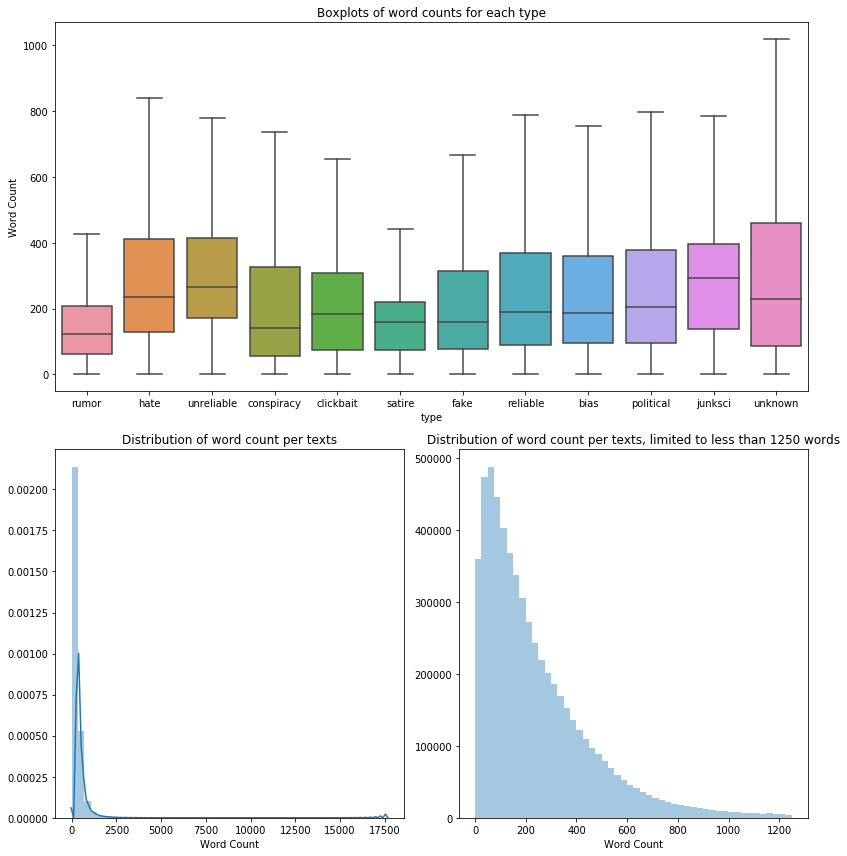

In [79]:
fig = plt.figure(1, figsize = (12, 12))
#gridspec.GridSpec(3,3)
ax1 = plt.subplot2grid((10, 10), (0, 0), colspan=10, rowspan = 5)
ax2 = plt.subplot2grid((10, 10), (5, 0), colspan = 5, rowspan = 5)
ax3 = plt.subplot2grid((10, 10), (5, 5), colspan = 5, rowspan = 5)
sns.boxplot(x='type', y='word_count', data=data, ax = ax1, showfliers = False)
ax1.set_title('Boxplots of word counts for each type')
ax1.set_ylabel('Word Count')
sns.distplot(data['word_count'], ax = ax2, kde = True)
ax2.set_title('Distribution of word count per texts')
ax2.set_xlabel('Word Count')
sns.distplot(data[data['word_count'] < 1250]['word_count'], ax = ax3, kde = False)
ax3.set_title('Distribution of word count per texts, limited to less than 1250 words')
ax3.set_xlabel('Word Count')
fig.tight_layout()
plt.savefig('out/fake_corpus_summary1.pdf')

In [30]:
np.sort(data['word_count'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  31,  32,  33,  34,  41,  43,  44, 155, 205, 302])

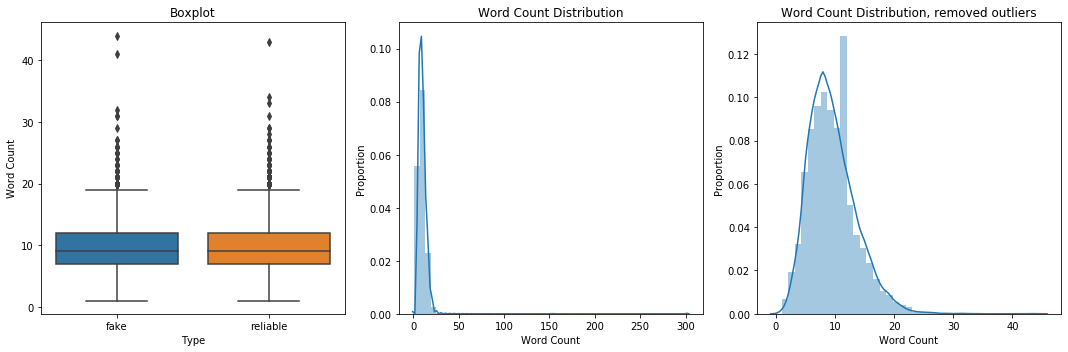

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
fig.subplots_adjust(hspace=1)
sns.boxplot(x='type', y='word_count', data=data[data['word_count'] < 150], ax=axes[0])
axes[0].set(title="Boxplot", xlabel='Type', ylabel='Word Count')
sns.distplot(data['word_count'], ax=axes[1])
axes[1].set(title="Word Count Distribution", xlabel='Word Count', ylabel='Proportion')
sns.distplot(data[data['word_count'] < 50]['word_count'], bins = len(data['word_count'].unique()), ax = axes[2])
axes[2].set(title="Word Count Distribution, removed outliers", xlabel='Word Count', ylabel='Proportion')
fig.tight_layout()
plt.savefig('out/liar_liar_summary.pdf')

In [38]:
data = [{'type' : res['type'], 'word_count' : res['word_count']} for res in collection.find({'type' : {'$in' : ['fake', 'reliable']}, 'domain' : {'$nin' : ['nytimes.com', 'beforeitsnews.com']}})]
data = pd.DataFrame(data)

Text(18.125, 0.5, 'Word Count')

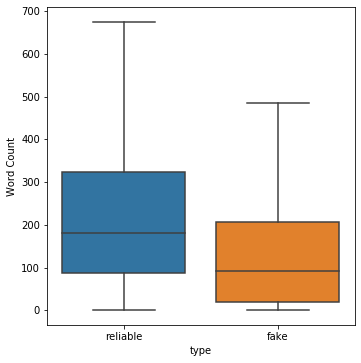

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5))
fig.tight_layout()
sns.boxplot(x='type', y='word_count', data=data, ax = axes, showfliers = False)
axes.set_ylabel('Word Count')

In [40]:
data = [{'type' : res['type'], 'word_count' : res['word_count']} for res in collection.find({'type' : {'$in' : ['fake', 'reliable']}, 'domain' : {'$in' : ['nytimes.com', 'beforeitsnews.com']}})]
data = pd.DataFrame(data)

Text(18.125, 0.5, 'Word Count')

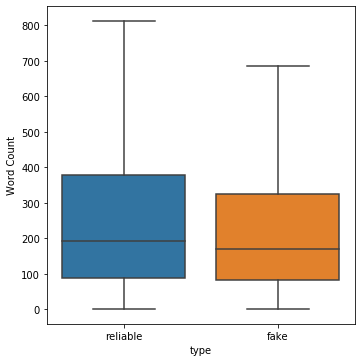

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5))
fig.tight_layout()
sns.boxplot(x='type', y='word_count', data=data, ax = axes, order = ['reliable', 'fake'], showfliers = False)
axes.set_ylabel('Word Count')